In [34]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import khaiii
from khaiii import KhaiiiApi
import seaborn as sns
import re
import gensim
from gensim import corpora
from gensim import models
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
apple = font_manager.FontProperties(fname = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf').get_name()
rc('font', family = apple)

/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
kb_df = pd.read_csv('kb.csv').drop(columns='Unnamed: 0')

/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
kb_df.head()

/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,DATE,STAR,LIKE,REVIEW
0,2021-3-9,별표 5개 만점에 1개를 받았습니다.,5,진짜 리뷰 지금까지 살면서 처음 써보는데 이따위 쓰레기 증권앱이 존재한다는게 참 어...
1,2021-3-10,별표 5개 만점에 1개를 받았습니다.,1,최악이네요.... 업데이트 이후 실행단계에서 다음으로 안넘어가네요. 요즘같은 시기에...
2,2021-3-8,별표 5개 만점에 5개를 받았습니다.,8,"최근에 코스피, 코스피200, 코스닥, 코스닥 150 등 지수들 차트가 안뜨는 경우..."
3,2021-3-10,별표 5개 만점에 2개를 받았습니다.,1,주식현재가 창으로 넘어가면 왜 무조건 호가창을 보여주게 하나요 옵션으로 바꾸게 해주...
4,2021-3-5,별표 5개 만점에 2개를 받았습니다.,1,진짜 플레이 앱에 리뷰 살면서 한번도 안써봤는데 제발 개발진 여러분 부탁이니깐 1월...


In [5]:
kb_df.shape

/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7360, 4)

### Data Preprocessing ###

In [6]:
kb_df['STAR'] = kb_df['STAR'].apply(lambda x: x[10])
kb_df.head()

/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,DATE,STAR,LIKE,REVIEW
0,2021-3-9,1,5,진짜 리뷰 지금까지 살면서 처음 써보는데 이따위 쓰레기 증권앱이 존재한다는게 참 어...
1,2021-3-10,1,1,최악이네요.... 업데이트 이후 실행단계에서 다음으로 안넘어가네요. 요즘같은 시기에...
2,2021-3-8,5,8,"최근에 코스피, 코스피200, 코스닥, 코스닥 150 등 지수들 차트가 안뜨는 경우..."
3,2021-3-10,2,1,주식현재가 창으로 넘어가면 왜 무조건 호가창을 보여주게 하나요 옵션으로 바꾸게 해주...
4,2021-3-5,2,1,진짜 플레이 앱에 리뷰 살면서 한번도 안써봤는데 제발 개발진 여러분 부탁이니깐 1월...


In [7]:
max_date = kb_df['DATE'].max()
min_date = kb_df['DATE'].min()

print(f'max date is {max_date}. min date is {min_date}.')

max date is 2021-3-9. min date is 2016-1-10.


/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Exploratory Data Analysis ###

In [8]:
ratings = kb_df['STAR'].value_counts().sort_index()
rating_df = pd.DataFrame(ratings)
rating_df['RATING'] = rating_df['STAR'] / rating_df['STAR'].sum()

/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
rating_df.head()

/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,STAR,RATING
1,3529,0.479484
2,427,0.058016
3,502,0.068207
4,705,0.095788
5,2197,0.298505


/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


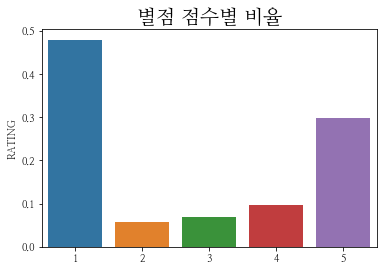

In [10]:
sns.barplot(x=rating_df.index, y=rating_df['RATING'])
plt.title("별점 점수별 비율", fontsize=20)
plt.show()

### Natural Language Processing ###

In [11]:
def extract_noun(word_object_list):
    extracted_word_noun_list = []
    
    for i, word_object in enumerate(word_object_list):
        word_object_morphs = word_object.morphs
        
        for word in word_object_morphs:
            if word.tag in ['NNG', 'NNP']:
                extracted_word_noun_list.append(word.lex)
    
    return extracted_word_noun_list


def execute_khaiii(user_comment_list):
    sentence_analyze_components = []
    kha_api = KhaiiiApi()
    
    for i, user_comment in enumerate(user_comment_list):
        word_object_list = []
        user_comment_analyze_objects = kha_api.analyze(user_comment)
        
        for user_comment_analyze_object in user_comment_analyze_objects:
            word_object_list.append(user_comment_analyze_object)
            
        extracted_noun_list = extract_noun(word_object_list)  
        sentence_analyze_components.append(extracted_noun_list)
    
    return sentence_analyze_components

/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
review_list = kb_df['REVIEW'].tolist()
all_comment_noun_list = execute_khaiii(review_list)

/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
all_comment_noun_list[0]

/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['진짜',
 '리뷰',
 '지금',
 '처음',
 '쓰레기',
 '증권',
 '존재',
 '어처구니',
 '일반',
 '어플',
 '돈',
 '돈',
 '거래',
 '플',
 '구',
 '허접',
 '구',
 '운영',
 '이',
 '구',
 '관리',
 '당장']

In [14]:
kb_df['REVIEW'][0]

/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'진짜 리뷰 지금까지 살면서 처음 써보는데 이따위 쓰레기 증권앱이 존재한다는게 참 어처구니 없음. 그냥 일반 어플도 아니고 돈으로 돈을 거래하는 어플인데 이따구로 허접하나;; 이따구로 운영하고 이따구로 관리할거면 그냥 하지마세요 제발. 당장 지웁니다'

In [15]:
def delete_stopwords(word):
    regex = '[ㄱ-ㅎㅏ-ㅣ]+'
    changed_word = re.sub(pattern=regex, repl='None', string=word)
    
    return changed_word

def get_dataframe_from_noun_list(extracted_user_comment_noun_list):
    word_count_dict = {}
    
    for i, word_list in enumerate(extracted_user_comment_noun_list):
        for word in word_list:
            if word not in word_count_dict:
                word_count_dict[word] = 1
            else:
                word_count_dict[word] += 1
                
    word_count_df = pd.DataFrame.from_dict(word_count_dict, orient='index') \
                                .reset_index() \
                                .rename(columns = {'index': 'word', 0 : 'count'}) \
                                .sort_values(by='count', ascending=False) \
                                .reset_index(drop=True)
    word_count_df['word'] = word_count_df['word'].apply(delete_stopwords)
    word_count_df_new = word_count_df[word_count_df['word']!='None']
    
    return word_count_df_new

def draw_graph(word_count_df_new):
    plt.figure(figsize = (15, 5))
    sns.barplot(x = 'word', y = 'count', data=word_count_df_new[0:15])
    plt.title('high frequency Top 15 words', fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.show()

/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


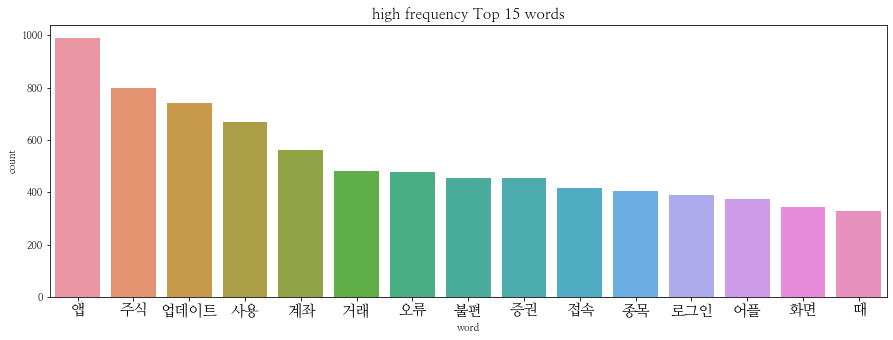

In [16]:
all_comment_word_count_df = get_dataframe_from_noun_list(all_comment_noun_list)
draw_graph(all_comment_word_count_df)

In [17]:
id2word = corpora.Dictionary(all_comment_noun_list)

texts = all_comment_noun_list

corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1])

[[(0, 1), (1, 1), (2, 3), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)]]


/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
all_comment_noun_list[0]

/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['진짜',
 '리뷰',
 '지금',
 '처음',
 '쓰레기',
 '증권',
 '존재',
 '어처구니',
 '일반',
 '어플',
 '돈',
 '돈',
 '거래',
 '플',
 '구',
 '허접',
 '구',
 '운영',
 '이',
 '구',
 '관리',
 '당장']

In [19]:
id2word

/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
num_topics = 5
ldamodel = LdaModel(corpus, num_topics, id2word, passes=15)
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.046*"주식" + 0.028*"증권" + 0.020*"정보" + 0.019*"해외" + 0.017*"자산"')
(1, '0.037*"업데이트" + 0.031*"계좌" + 0.025*"로그인" + 0.021*"접속" + 0.019*"앱"')
(2, '0.031*"불편" + 0.030*"앱" + 0.027*"종목" + 0.022*"화면" + 0.016*"업데이트"')
(3, '0.038*"사용" + 0.017*"최악" + 0.017*"거래" + 0.016*"앱" + 0.012*"접속"')
(4, '0.032*"오류" + 0.023*"사용" + 0.017*"굿" + 0.016*"실행" + 0.016*"종료"')


In [21]:
coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.4255259795588936


In [41]:
mallet_path = 'mallet/mallet-2.0.8/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=5, id2word=id2word)

/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
# Show Topics
print(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=texts, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0, [('앱', 0.03623406604436415), ('번호', 0.021780588176252134), ('개선', 0.02077687443541102), ('문제', 0.01917093245006524), ('고객', 0.017163504968383016), ('입력', 0.016962762220214794), ('시간', 0.01656127672387835), ('최악', 0.016059419853457792), ('손해', 0.015657934357121348), ('리뷰', 0.014353106494027903)]), (1, [('주식', 0.0805701577031945), ('계좌', 0.05661140315406389), ('거래', 0.04852405984634048), ('증권', 0.04569348968863728), ('어플', 0.03770723817226041), ('때', 0.032652648604933276), ('해외', 0.027598059037606145), ('수수료', 0.02395875454913061), ('개설', 0.018904164981803476), ('가입', 0.017994338859684593)]), (2, [('업데이트', 0.0741703318672531), ('종목', 0.04048380647740903), ('로그인', 0.038884446221511396), ('확인', 0.027489004398240705), ('인증', 0.024190323870451818), ('후', 0.020191923230707717), ('관심', 0.020191923230707717), ('등록', 0.018892443022790882), ('로그', 0.017393042782886847), ('종료', 0.015893642542982808)]), (3, [('앱', 0.06333064840918244), ('오류', 0.04661699556987515), ('접속', 0.042086186065243655),

/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.38008420438274265


In [70]:
def compute_coherence_score(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        print("topic num is {}".format(num_topics))
        
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
model_list, coherence_values = compute_coherence_score(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=40, step=3)

/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


topic num is 2
topic num is 5
topic num is 8
topic num is 11
topic num is 14
topic num is 17
topic num is 20
topic num is 23
topic num is 26
topic num is 29
topic num is 32
topic num is 35
topic num is 38


/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


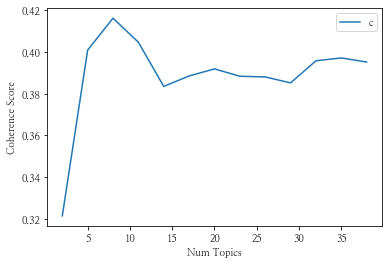

In [76]:
start=2; limit=40; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.legend(("coherence_values"), loc='best')
plt.show();

In [77]:
for k, cv in zip(x, coherence_values):
    print("Number of Topics =", k, " has Coherence Score of", round(cv, 4))

Number of Topics = 2  has Coherence Score of 0.3214
Number of Topics = 5  has Coherence Score of 0.401
Number of Topics = 8  has Coherence Score of 0.4163
Number of Topics = 11  has Coherence Score of 0.4047
Number of Topics = 14  has Coherence Score of 0.3835
Number of Topics = 17  has Coherence Score of 0.3886
Number of Topics = 20  has Coherence Score of 0.3919
Number of Topics = 23  has Coherence Score of 0.3884
Number of Topics = 26  has Coherence Score of 0.3881
Number of Topics = 29  has Coherence Score of 0.3852
Number of Topics = 32  has Coherence Score of 0.3958
Number of Topics = 35  has Coherence Score of 0.3972
Number of Topics = 38  has Coherence Score of 0.3952


/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))

[(0, '0.113*"앱" + 0.075*"오류" + 0.032*"후" + 0.029*"문제" + 0.025*"종료" + 0.024*"실행" + 0.020*"확인" + 0.020*"수정" + 0.019*"설치" + 0.017*"해결"'), (1, '0.129*"주식" + 0.078*"거래" + 0.053*"때" + 0.044*"해외" + 0.029*"매도" + 0.027*"매수" + 0.025*"자산" + 0.023*"주문" + 0.022*"매매" + 0.017*"중요"'), (2, '0.107*"사용" + 0.073*"불편" + 0.055*"화면" + 0.033*"이용" + 0.027*"가능" + 0.021*"처음" + 0.020*"관리" + 0.017*"디자인" + 0.016*"표시" + 0.016*"검색"'), (3, '0.124*"업데이트" + 0.052*"기능" + 0.043*"증권" + 0.038*"편리" + 0.031*"개선" + 0.022*"메뉴" + 0.021*"설정" + 0.018*"굿" + 0.018*"필요" + 0.015*"이번"'), (4, '0.060*"어플" + 0.052*"증권사" + 0.043*"앱" + 0.040*"진짜" + 0.026*"최악" + 0.024*"플" + 0.024*"먹통" + 0.020*"사람" + 0.018*"짜증" + 0.018*"쓰레기"'), (5, '0.085*"계좌" + 0.057*"로그인" + 0.037*"인증" + 0.033*"번호" + 0.029*"등록" + 0.028*"개설" + 0.027*"가입" + 0.026*"로그" + 0.026*"입력" + 0.020*"인식"'), (6, '0.067*"종목" + 0.053*"정보" + 0.039*"수수료" + 0.033*"관심" + 0.029*"투자" + 0.027*"ㅎ" + 0.024*"확인" + 0.022*"마블" + 0.022*"차트" + 0.018*"수익"'), (7, '0.066*"접속" + 0.031*"돈" + 0.031*"증권" + 0.02

/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
pyLDAvis.enable_notebook()
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(optimal_model)
visualization = pyLDAvis.gensim.prepare(model, corpus, id2word)
visualization

/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/home/tako/anaconda3/envs/mingu/lib/python3.8/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.148169  0.137887       1        1  12.814224
7      0.081130 -0.240264       2        1  12.772248
0     -0.293534  0.057942       3        1  12.585832
1      0.130053  0.172324       4        1  12.556767
2      0.203084  0.155285       5        1  12.479867
4     -0.280357  0.095594       6        1  12.363343
6     -0.031057 -0.068313       7        1  12.226134
3      0.042512 -0.310455       8        1  12.201585, topic_info=      Term        Freq       Total Category  logprob  loglift
51      주식  810.000000  810.000000  Default  30.0000  30.0000
32    업데이트  755.000000  755.000000  Default  29.0000  29.0000
70       앱  980.000000  980.000000  Default  28.0000  28.0000
247     사용  669.000000  669.000000  Default  27.0000  27.0000
62      계좌  543.000000  543.000000  Default  26.0000  26.0000
...    ...         ...         ...      ...      ...      ...
33      요즘   44.784564   45.773982   Topic8  -4.9135   2.0818
13      증권  260.564734  459.590522   Topic8  -3.1525   1.5361
1032    완전   46.820226   51.803163   Topic8  -4.8690   2.0025
711     ㅋㅋ   61.069860  112.296759   Topic8  -4.6033   1.4945
1830    유용   37.659747   43.686441   Topic8  -5.0868   1.9552

[560 rows x 6 columns], token_table=      Topic      Freq Term
term                      
430       6  1.005407    ㅋ
711       7  0.454154   ㅋㅋ
711       8  0.543204   ㅋㅋ
1102      7  1.001568    ㅎ
1090      1  1.029545    ㅜ
...     ...       ...  ...
100       1  1.003806  휴대폰
2228      2  0.994846   휴일
2537      4  0.983862   흥미
2723      8  0.982481   희망
2480      4  0.983862    🙏

[592 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 8, 1, 2, 3, 5, 7, 4])